<a href="https://colab.research.google.com/github/erkulev/erk/blob/main/%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B8_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BB%D0%B5%D1%81%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

рассмотрим еще один мощныйнепараметрический алгоритм — случайные леса (random forests). Случайные леса — пример одного из методов ансамблей (ensemble), основанных на агрегировании результатов ансамбля более простых оценивателей.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Деревья решений — исключительно интуитивно понятные способы классификации или маркирования объектов. По сути, все сводится к классификации путем задания серии уточняющих вопросов.

**Создание дерева принятия решений**

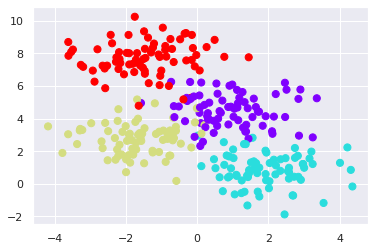

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Процесс обучения дерева принятия решений на наших данных можно выполнить в Scikit-Learn с помощью оценивателя DecisionTreeClassifier:

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Напишем небольшую вспомогательную функцию, чтобы облегчить визуализацию вывода классификатора:

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


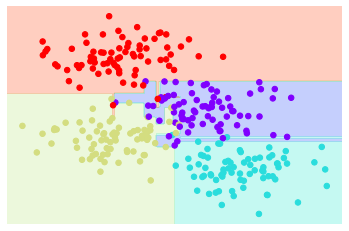

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [9]:
%%file helpers_05_08.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1,2,3,4, 5])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);

Overwriting helpers_05_08.py


In [8]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

Обратите внимание, что по мере возрастания глубины мы получаем области классификации очень странной формы. Например, на глубине, равной 5, между желтой и синей областями появляется узкая и вытянутая в высоту фиолетовая область. Очевидно, что такая конфигурация является скорее не результатом собственно распределения данных, а конкретной их дискретизации или свойств шума в них. То есть это дерево принятия решений на глубине всего лишь пяти уровней уже очевидным образом переобучено.

In [10]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

Подобное переобучение присуще всем деревьям принятия решений: нет ничего проще, чем дойти до слишком глубокого уровня дерева, аппроксимируя таким образом нюансы конкретных данных вместо общих характеристик распределений, из которых они получены. Другой способ увидеть это переобучение — обратиться к моделям, обученным на различных подмножествах набора данных, например, показано обучение двух различных деревьев, каждое на половине исходного набора данных.
Очевидно, что в некоторых местах результаты этих двух деревьев не противоречат друг другу (например, в четырех углах), а в других местах их классификации очень сильно различаются (например, в областях между любыми двумя кластерами). Важнейший вывод из этого рисунка: расхождения имеют тенденцию появляться в тех местах, где степень достоверности классификации ниже, а значит, мы можем добиться лучшего результата, используя информацию из обоих деревьев!

**Ансамбли оценивателей: случайные леса**

Идея комбинации нескольких переобученных оценивателей для снижения эффекта этого переобучения лежит в основе метода ансамблей под названием «баггинг» (bagging). Баггинг использует ансамбль (например, своеобразную «шляпу фокусника») параллельно работающих переобучаемых оценивателей и усредняет результаты для получения оптимальной классификации. Ансамбль случайных деревьев принятия решений называется случайным лесом (random forest).

Выполнить подобную баггинг-классификацию можно вручную с помощью метаоценивателя BaggingClassifier из библиотеки Scikit-Learn,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


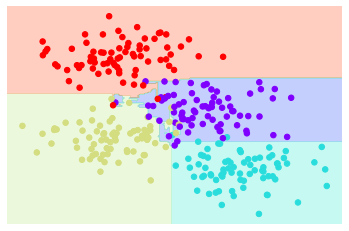

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

В этом примере мы рандомизировали данные путем обучения всех оценивателей на случайном подмножестве, состоящем из 80 % обучающих точек. На практикедля более эффективной рандомизации деревьев принятия решений обеспечивается определенная стохастичность процесса выбора разбиений. При этом всякий раз в обучении участвуют все данные, но результаты обучения все равно сохраняют требуемую случайность.

В библиотеке Scikit-Learn подобный оптимизированный ансамбль случайных деревьев принятия решений, автоматически выполняющий всю рандомизацию, реализован в оценивателе RandomForestClassifier. Все, что остается сделать, — выбрать количество оценивателей и он очень быстро (при необходимости параллельно) обучит ансамбль деревьев

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


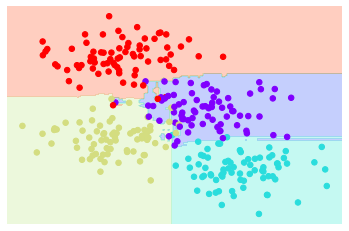

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

Как видим, путем усреднения более чем 100 случайно возмущенных моделей мы получаем общую модель, намного более близкую к нашим интуитивным представлениям о правильном разбиении параметрического пространства.

**Регрессия с помощью случайных лесов**

Случайные леса могут также оказаться полезными для регрессии (то есть непрерывных, а не категориальных величин). В этом случае используется оцениватель RandomForestRegressor

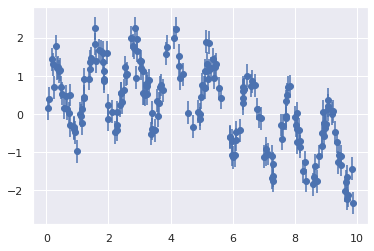

In [13]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Найти оптимальную аппроксимирующую кривую с помощью регрессии на основе случайного леса можно следующим образом

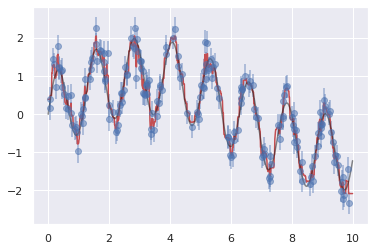

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

На этом рисунке настоящая модель показана гладкой, а модель на основе случайного леса — «рваной» кривой. Как вы можете видеть, непараметрическая модель на основе случайного леса достаточно гибка для аппроксимации мультипериодических данных, без необходимости использования мультипериодической модели!

**использование случайного леса для классификации цифр**

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

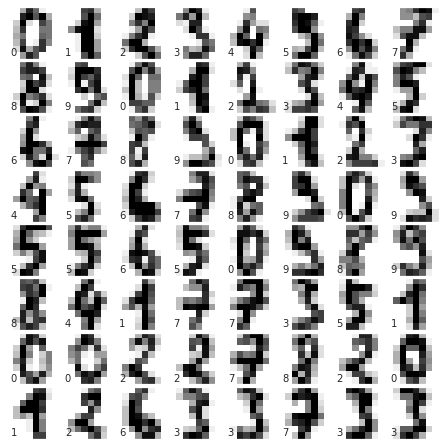

In [16]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [18]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Взглянем на отчет о классификации для данного классификатора:

In [19]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



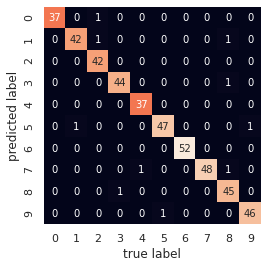

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

В этом разделе мы познакомили вас с понятием ансамблей оценивателей (ensemble estimators) и, в частности, модели случайного леса — ансамбля случайных деревьевпринятия решений. Случайные леса — мощный метод, обладающий несколькими достоинствами.

-
Как обучение, так и предсказание выполняются очень быстро в силу простоты лежащих в основе модели деревьев принятия решений. Кроме того, обе задачи допускают эффективную параллелизацию, так как отдельные деревья представляют собой совершенно независимые сущности.

-
Вариант с несколькими деревьями дает возможность использования вероятностной классификации: решение путем «голосования» оценивателей дает оценку вероятности (в библиотеке Scikit-Learn ее можно получить с помощью метода predict_proba()).

-
Непараметрическая модель исключительно гибка и может эффективно работать с задачами, на которых другие оцениватели оказываются недообученными.

Основной недостаток случайных лесов состоит в том, что результаты сложно интерпретировать.Чтобы сделать какие-либо выводы относительно смысла модели классификации, случайные леса — не лучший вариант.